In [17]:
import mysql.connector
import pandas as pd 
from sklearn.cluster import KMeans

In [18]:
conexion = mysql.connector.connect(user="root",password="", host="localhost",database="tienda",port="3306")

In [19]:
cur = conexion.cursor()                               
cur.execute("select nombre from producto where existencia_bodega>0")   
productos_en_bodega = ("CUR",cur.fetchall())   


In [20]:
# pasar base de datos a data frame para hacer mas comodo el trabajo
cur.execute("select * from producto")
data = cur.fetchall()   
 
df = pd.DataFrame(data, columns=[i[0] for i in cur.description])
df.head()


,id,nombre,precio,id_fabricante,existencia_bodega
0,1,Disco duro SATA3 1TB,86.99,5,12
1,2,Memoria RAM DDR4 8GB,120.00,6,4
2,3,Disco SSD 1 TB,150.99,4,20
3,4,GeForce GTX 1050Ti,185.00,7,3
4,5,GeForce GTX 1080 Xtreme,755.00,6,5


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 11 non-null     int64  
 1   nombre             11 non-null     object 
 2   precio             11 non-null     float64
 3   id_fabricante      11 non-null     int64  
 4   existencia_bodega  11 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 568.0+ bytes


In [22]:
data = df.drop(columns=["nombre","id"])


In [23]:
def minmax_norm(df_input):
    return (data - data.min()) / ( data.max() - data.min())

data_norm = minmax_norm(data)

print(data_norm)

      precio  id_fabricante  existencia_bodega
0   0.038848       0.666667               0.60
1   0.086344       0.833333               0.20
2   0.130933       0.500000               1.00
3   0.179868       1.000000               0.15
4   1.000000       0.833333               0.25
5   0.204328       0.000000               0.70
6   0.267622       0.000000               0.10
7   0.717990       0.166667               0.50
8   0.552524       0.166667               0.00
9   0.000000       0.333333               0.00
10  0.172674       0.333333               0.55


In [24]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

c:\Users\juans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\juans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\juans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\juans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

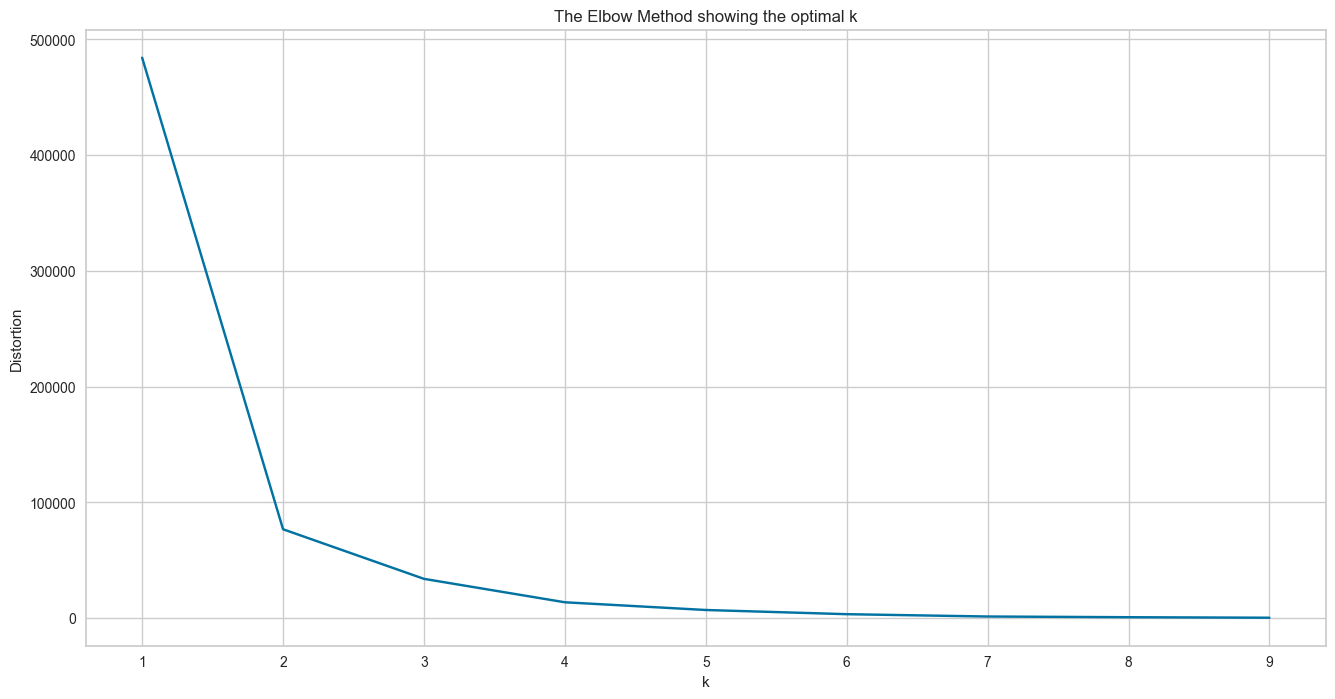

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

c:\Users\juans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


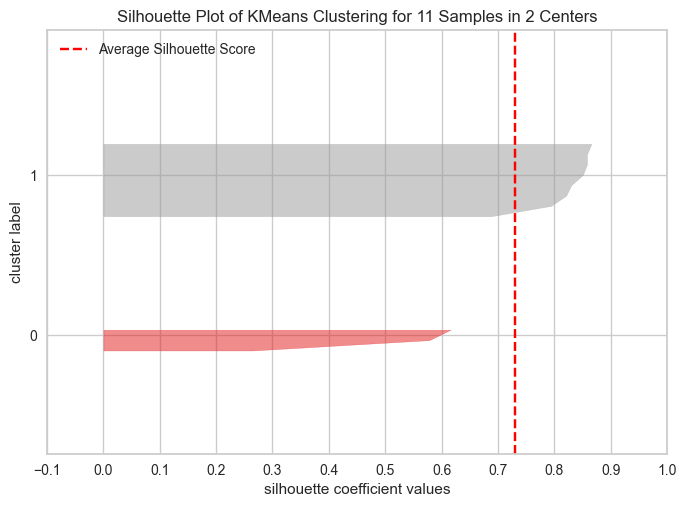

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 11 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [26]:
from yellowbrick.cluster import SilhouetteVisualizer

model_5clust = KMeans(n_clusters = 2, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_5clust)
sil_visualizer.fit(data)    
sil_visualizer.show()

In [27]:
kmeans = KMeans(n_clusters=2, random_state=42) 
kmeans = kmeans.fit(data_norm); 

c:\Users\juans\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
a =kmeans.cluster_centers_
a

array([[0.31918965, 0.16666667, 0.30833333],
       [0.28719875, 0.76666667, 0.44      ]])

In [29]:

centroides_desnormalizados = []

# desnormalizar centroides :DD 

for centroide_normalizado in a:
    centroide_desnormalizado = []
    for i, valor_normalizado in enumerate(centroide_normalizado):
        # Aplicar la desnormalización para cada característica
        valor_desnormalizado = valor_normalizado * data.iloc[:, i].std() + data.iloc[:, i].mean()
        centroide_desnormalizado.append(valor_desnormalizado)
    centroides_desnormalizados.append(centroide_desnormalizado)

centroides_desnormalizados

[[341.92903861744315, 3.9881268717043605, 9.358401608931755],
 [334.89267496025263, 5.254474518930968, 10.210220281247084]]

Vemos que los productos con los que contamos se pueden dividir en dos grupos

Cluster 1: Id del fabricante siendo 4 que significa que el producto es de Samsung y con aproximadamente 9 en bodega

Cluster 2: Id fabricante 5 o acercanos, más o menos 10 en bodega

Ambos clusters con precios que rondan en los 300


In [30]:
data

,precio,id_fabricante,existencia_bodega
0,86.99,5,12
1,120.00,6,4
2,150.99,4,20
3,185.00,7,3
4,755.00,6,5
5,202.00,1,14
6,245.99,1,2
7,559.00,2,10
8,444.00,2,0
9,59.99,3,0
